Assignment #1

Two datasets have been used in this research.
Dataset1: CPC Soil Moisture
Dataset2: CPC Merged Analysis of Precipitation (CMAP)

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

Part A ( Read dataset in the notebook AND Make a contour plot )
A-1- Dataset1: CPC Soil Moisture
A-2- Dataset2: CPC Merged Analysis of Precipitation (CMAP)

In [132]:
# A-1- Path to the Soil Moisture dataset and query of the dataset attribute
file = "/scratch/zghodsiz/soilw.mon.mean.v2.nc"
ds1 = xr.open_dataset(file)
ds1

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 884)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-08-01
Data variables:
    soilw    (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          CPC Soil Moisture
    institution:    NOAA/ESRL PSD
    dataset_title:  CPC Soil Moisture
    history:        Wed Oct 18 15:13:37 2017: ncks -d time,,-2 soilw.mon.mean...
    NCO:            4.6.9
    References:     https://www.psl.noaa.gov/data/gridded/data.cpcsoil.html

In [134]:
ds1.soilw
ds1['soilw']

<xarray.DataArray 'soilw' (time: 884, lat: 360, lon: 720)>
[229132800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-08-01
Attributes:
    long_name:      Model-Calculated Monthly Mean Soil Moisture
    units:          mm
    valid_range:    [   0. 1000.]
    dataset:        CPC Monthly Soil Moisture
    var_desc:       Soil Moisture
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Other
    standard_name:  lwe_thickness_of_soil_moisture_content
    cell_methods:   time: mean (monthly from values)
    actual_range:   [0.000000e+00 9.999318e+29]

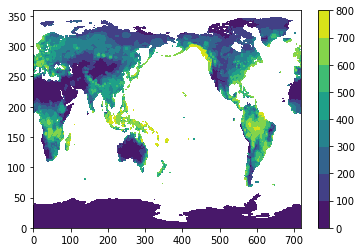

In [143]:
# A-1- Create the contour plot of soil moisture data
plt.contourf(ds1['soilw'][0,-1::-1,:]) ; plt.colorbar()

In [147]:
# A-2- Path to the Precipitation dataset and query of the dataset attribute
file = "/scratch/zghodsiz/precip.mon.mean.nc"
ds2 = xr.open_dataset(file)
ds2

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 512)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-08-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          CPC Merged Analysis of Precipitation (includes NCEP Reana...
    platform:       Analyses
    source:         ftp ftp.cpc.ncep.noaa.gov precip/cmap/monthly
    dataset_title:  CPC Merged Analysis of Precipitation
    documentation:  https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
    date_modified:  26 Feb 2019
    References:     https://www.psl.noaa.gov/data/gridded/data.cmap.html
    version:        V2109
    history:        update 09/2021 V2109
    data_modified:  2021-09-13

In [150]:
ds2.precip
ds2['precip']

<xarray.DataArray 'precip' (time: 512, lat: 72, lon: 144)>
[5308416 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-08-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [ 0. 70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Enhanced
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.   59.08]

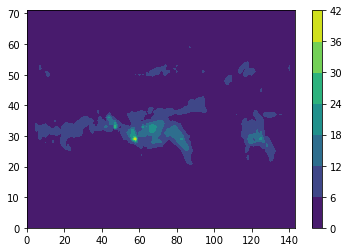

In [151]:
# A-2- Create the contour plot of Precipitation  data
plt.contourf(ds2['precip'][0,-1::-1,:]) ; plt.colorbar()

In [ ]:
Part B - Plot with a map
B-1- Dataset1: CPC Soil Moisture
B-2- Dataset2: CPC Merged Analysis of Precipitation (CMAP)

In [159]:
# B-1- Take the mean soil moisture over the entire period of the plot
ds1_mean=ds1.mean(dim='time')

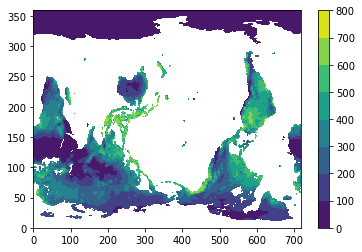

In [169]:
# B-1- Create the contour plot of the mean soil moisture 
plt.contourf(ds1_mean['soilw']); 
plt.colorbar()

In [172]:
# B-1- Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds1['lon'], ds1['lat'], ds1_mean['soilw'],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd7985f1950> (for post_execute):


URLError: <urlopen error [Errno -2] Name or service not known>

URLError: <urlopen error [Errno -2] Name or service not known>

<Figure size 792x612 with 1 Axes>

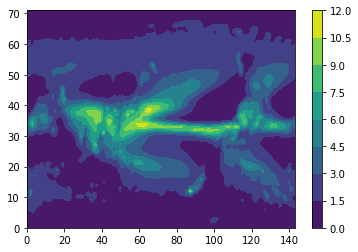

In [168]:
plt.contourf(ds2_mean['precip'])
plt.colorbar()

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['soilw']
data, lons = add_cyclic_point(data, coord=ds1['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds1['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean['soilw']
data, lons = add_cyclic_point(data, coord=ds1['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds1['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs)

In [ ]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.Robinson())

# Add cyclic point to data
data=ds_mean['soilw']
data, lons = add_cyclic_point(data, coord=ds1['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, ds1['lat'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Soil Moisture')

# Add title
plt.title('CPC Soil Moisture')